# Практическое задание

In [141]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, label_binarize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, auc

Визуализация набора данных MNIST

In [70]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

* Расмотрим задачу как задачу кластарезации когда класы еще не определены и необходимо их выделить 

# Стандартизация данных # 
* ( т.к признаки могут изменятся в разных маштабах) Стандартизация - преобразует значения так что из каждого наблюдаемого значения каждого признака вычитается среднее значение  и результат делится на Стандартное отклонение. в результате все признаки будут в 1 маштбе. Стандатизация так же приводит данные к нормальному распределению

In [71]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [72]:
X.shape 

(1797, 64)

## Понижение размерности

**PCA**
При решении задачи кластеризации зачастую возможных кластеров может быть очень много. 
С помощью PCA вычисление главных компоненты может быть сведено к вычислению сингулярного разложения матрицы данных или к вычислению собственных векторов и собственных значений ковариационной матрицы(это матрица, составленная из попарных ковариацийс(зависимости 2х случайных величин друг от друга) элементов одного или двух случайных векторов.) исходных данных. Сингулярное разложение матриз позволяет разложить вещественую матрицу и привести ее к каноническому виду

In [73]:
pca = PCA(n_components=10) #  у нас 10 цифр поэтому компонентов 10
X_reduced = pca.fit_transform(X)
X_reduced.shape

(1797, 10)

In [74]:
# функция для визуализации кластеров
def display_components_in_2D_space(components_df, labels=None):
    components_with_labels_df = pd.concat([components_df, pd.DataFrame(labels)], axis=1) # сложим данные 

    figsize = (10, 7)
    if labels is not None: # если lable подали в функцию
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', 
                                         c=components_with_labels_df.iloc[:, -1], cmap=plt.get_cmap('jet'),
                                         alpha=0.5, figsize=figsize)
    else: # если lable не подали в функцию
        components_with_labels_df.plot(kind='scatter', x='component_1', y='component_2', alpha=0.5, figsize=figsize)

    plt.xlabel('component_1')
    plt.ylabel('component_2')
    plt.title('2D mapping of objects')    
    plt.show()

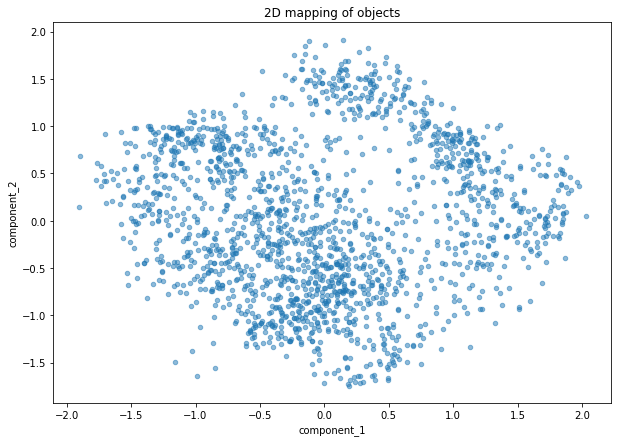

In [75]:
dims = 10
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_reduced = pd.DataFrame(data=X_reduced, columns=colnames)
components_X_reduced.head()

display_components_in_2D_space(components_X_reduced)

**TSNE**
Стохастическое вложение соседей с t-распределением - является техникой нелинейного снижения размерности, хорошо подходящей для вложения данных высокой размерности для визуализации в пространство низкой размерности (двух- или трехмерное). В частности, метод моделирует каждый объект высокой размерности двух- или трёхмерной точкой таким образом, что похожие объекты моделируются близко расположенными точками, а непохожие точки моделируются далеко друг от друга отстоящими.

In [76]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17, perplexity=25)

X_tsne = tsne.fit_transform(X);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


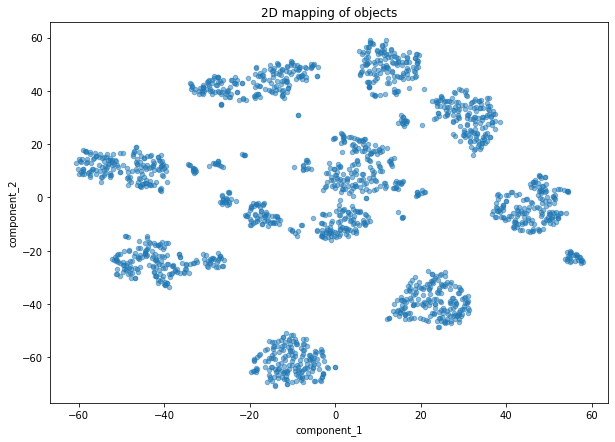

In [77]:
dims = 2
colnames = ['component_' + str(i) for i in range(1, dims+1)]
components_X_tsne = pd.DataFrame(data=X_tsne, columns=colnames)
components_X_tsne.head()

display_components_in_2D_space(components_X_tsne)

## Кластеризация

**KMeans**
 основа метода что данные произвольно разбиваются на кластеры, после чего итеративно перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

In [78]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [79]:
kmeans = KMeans(n_clusters=10, random_state=42) # здадим 10 класов
labels_clast = kmeans.fit_predict(X)
labels_clast = pd.Series(labels_clast, name='clusters') # предикт метки

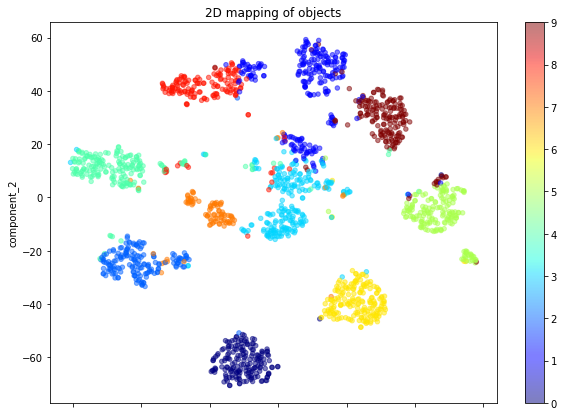

In [80]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

**AgglomerativeClustering**

In [81]:
%%time
aggl = AgglomerativeClustering(n_clusters=11)
labels_clast = aggl.fit_predict(X)
labels_clast = pd.Series(labels_clast)

CPU times: total: 266 ms
Wall time: 266 ms


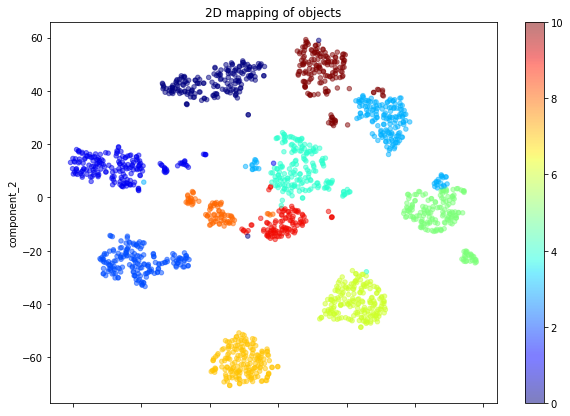

In [82]:
display_components_in_2D_space(components_X_tsne, labels=labels_clast)

In [ ]:
Видим  что у есть спорный класс красно оранжевый бирюзовый

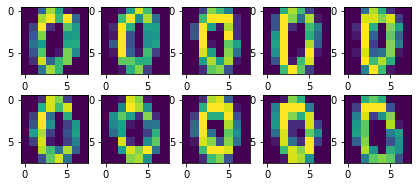

In [83]:
plt.figure(figsize=(7, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[labels_clast == 7][i,:].reshape([8,8]))

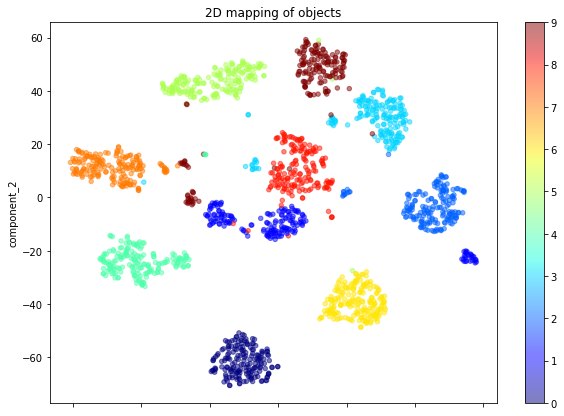

In [84]:
display_components_in_2D_space(components_X_tsne, labels=y)

In [85]:
y[:10] # ответ отклик

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

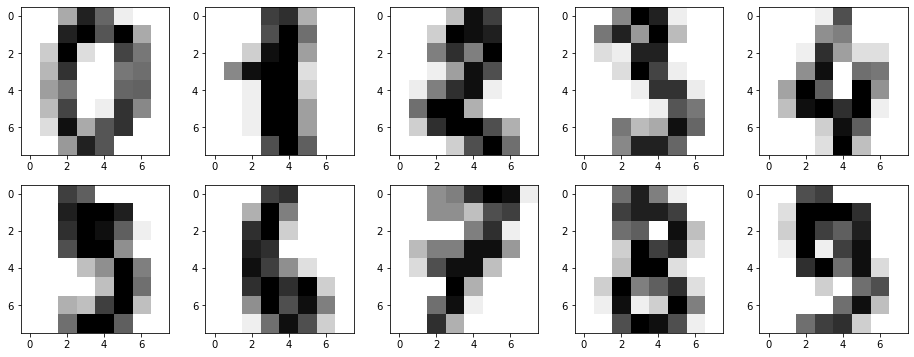

In [86]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)# подграфик
    plt.imshow(X[i,:].reshape([8,8]), cmap='binary')

In [87]:
print(f'Признаком в анном случае является пиксели и степень их закраcки -{digits.feature_names},\nНашим откликомб целью является принадлежность к одному из следующих классов - {digits.target_names}')

Признаком в анном случае является пиксели и степень их закраcки -['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
Нашим откликомб целью является принадлежность к одному из следующих классов - [0 1 2 3 4 5 6 7 8 9]


In [88]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

# Обучение модели и оценка обучения 

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

X_train.shape, X_test.shape

((1437, 64), (360, 64))

In [90]:
from sklearn.tree import DecisionTreeClassifier
# для теста
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train);
tree_predict = tree.predict(X_test)
tree_report = classification_report(y_test, tree_predict)
tree_accuracy = round(accuracy_score(y_test, tree_predict)*100,2)
print('Analitics for test set')
print(f'Acyracity of DecisionTreeClassifier - {tree_accuracy}\nClassification report  \n {tree_report}')

Analitics for test set
Acyracity of DecisionTreeClassifier - 85.83
Classification report  
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.92      0.79      0.85        28
           2       0.89      0.76      0.82        33
           3       0.77      0.88      0.82        34
           4       0.81      0.91      0.86        46
           5       0.91      0.91      0.91        47
           6       0.89      0.94      0.92        35
           7       0.86      0.91      0.89        34
           8       0.78      0.70      0.74        30
           9       0.85      0.82      0.84        40

    accuracy                           0.86       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.86      0.86       360



In [92]:
# для трейна
tree_predict = tree.predict(X_train)
tree_report = classification_report(y_train, tree_predict)
tree_accuracy = round(accuracy_score(y_train, tree_predict)*100,2)
print('Analitics for train set')
print(f'Acyracity of DecisionTreeClassifier - {tree_accuracy}\nClassification report  \n {tree_report}')

Analitics for train set
Acyracity of DecisionTreeClassifier - 100.0
Classification report  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       135
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       145
           8       1.00      1.00      1.00       144
           9       1.00      1.00      1.00       140

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437



## Снижение переобучения

In [93]:
new_tree = DecisionTreeClassifier(random_state=42,
                               min_samples_leaf=5,
                               max_depth=9)
new_tree.fit(X_train, y_train)

tree_predict = tree.predict(X_test)
tree_report = classification_report(y_test, tree_predict)
tree_accuracy = round(accuracy_score(y_test, tree_predict)*100,2)
print('Analitics for test set')
print(f'Acyracity of DecisionTreeClassifier - {tree_accuracy}\nClassification report  \n {tree_report}')

Analitics for test set
Acyracity of DecisionTreeClassifier - 85.83
Classification report  
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.92      0.79      0.85        28
           2       0.89      0.76      0.82        33
           3       0.77      0.88      0.82        34
           4       0.81      0.91      0.86        46
           5       0.91      0.91      0.91        47
           6       0.89      0.94      0.92        35
           7       0.86      0.91      0.89        34
           8       0.78      0.70      0.74        30
           9       0.85      0.82      0.84        40

    accuracy                           0.86       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.86      0.86       360



In [94]:
tree_predict = new_tree.predict(X_train)
tree_report = classification_report(y_train, tree_predict)
tree_accuracy = round(accuracy_score(y_train, tree_predict)*100,2)
print('Analitics for train set')
print(f'Acyracity of DecisionTreeClassifier - {tree_accuracy}\nClassification report  \n {tree_report}')

Analitics for train set
Acyracity of DecisionTreeClassifier - 90.33
Classification report  
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       145
           1       0.88      0.90      0.89       154
           2       0.97      0.91      0.94       144
           3       0.84      0.89      0.86       149
           4       0.87      0.91      0.89       135
           5       0.94      0.87      0.90       135
           6       0.98      0.93      0.95       146
           7       0.92      0.86      0.89       145
           8       0.85      0.88      0.86       144
           9       0.83      0.89      0.86       140

    accuracy                           0.90      1437
   macro avg       0.91      0.90      0.90      1437
weighted avg       0.91      0.90      0.90      1437



## Автоматизация поиска лучшего дерева решений

In [104]:
from sklearn.model_selection import GridSearchCV

param = {'min_samples_leaf': [ 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_depth': [3, 2, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20]}

gs = GridSearchCV(tree, param)
gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 2, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15,
                                       16, 17, 19, 20],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [105]:
print('Best for train')
gs.best_params_

Best for train


{'max_depth': 16, 'min_samples_leaf': 2}

In [106]:
print('Best for test')
gs.fit(X_test, y_test)
gs.best_params_

Best for test


{'max_depth': 11, 'min_samples_leaf': 2}

In [143]:
best_tree = DecisionTreeClassifier(random_state=42,
                               min_samples_leaf=2,
                               max_depth=12)

In [145]:
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=2, random_state=42)

In [146]:
tree_predict_train = best_tree.predict(X_train)
tree_report = classification_report(y_train, tree_predict_train)
tree_accuracy = round(accuracy_score(y_train, tree_predict_train)*100,2)
print(f'Acyracity of DecisionTreeClassifier - {tree_accuracy}\nClassification report  \n {tree_report}')

Acyracity of DecisionTreeClassifier - 96.17
Classification report  
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       145
           1       0.96      0.99      0.97       154
           2       0.93      0.97      0.95       144
           3       0.93      0.96      0.95       149
           4       0.95      0.96      0.95       135
           5       0.95      0.97      0.96       135
           6       1.00      0.95      0.98       146
           7       0.95      0.95      0.95       145
           8       0.97      0.92      0.95       144
           9       0.99      0.94      0.97       140

    accuracy                           0.96      1437
   macro avg       0.96      0.96      0.96      1437
weighted avg       0.96      0.96      0.96      1437



In [110]:
tree_predict_test = tree.predict(X_test)
tree_report = classification_report(y_test, tree_predict_test)
tree_accuracy = round(accuracy_score(y_test, tree_predict_test)*100,2)
print('Analitics for test set')
print(f'Acyracity of DecisionTreeClassifier - {tree_accuracy}\nClassification report  \n {tree_report}')

Analitics for test set
Acyracity of DecisionTreeClassifier - 85.83
Classification report  
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.92      0.79      0.85        28
           2       0.89      0.76      0.82        33
           3       0.77      0.88      0.82        34
           4       0.81      0.91      0.86        46
           5       0.91      0.91      0.91        47
           6       0.89      0.94      0.92        35
           7       0.86      0.91      0.89        34
           8       0.78      0.70      0.74        30
           9       0.85      0.82      0.84        40

    accuracy                           0.86       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.86      0.86       360



In [111]:
confusion_matrix(y_train, tree_predict_train)

array([[144,   0,   0,   0,   0,   0,   0,   0,   1,   0],
       [  0, 153,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   2, 140,   1,   0,   0,   0,   0,   0,   0],
       [  0,   2,   1, 143,   0,   0,   0,   2,   1,   0],
       [  0,   1,   1,   2, 129,   0,   0,   2,   0,   0],
       [  0,   0,   1,   2,   0, 131,   0,   0,   1,   0],
       [  0,   0,   1,   1,   3,   1, 139,   0,   1,   0],
       [  0,   0,   2,   2,   2,   0,   0, 138,   0,   1],
       [  1,   1,   2,   0,   2,   3,   0,   2, 133,   0],
       [  0,   1,   2,   1,   0,   3,   0,   1,   0, 132]], dtype=int64)

In [112]:
confusion_matrix(y_test, tree_predict_test)
# по диагонали лежит значение верно класифицированого класа числа ост в строке ошибочно класифиц ел

array([[29,  0,  1,  0,  1,  1,  0,  0,  0,  1],
       [ 0, 22,  1,  2,  1,  0,  0,  0,  1,  1],
       [ 1,  0, 25,  3,  0,  0,  1,  1,  2,  0],
       [ 0,  0,  0, 30,  0,  1,  1,  0,  1,  1],
       [ 0,  0,  0,  0, 42,  1,  1,  1,  1,  0],
       [ 0,  0,  0,  0,  2, 43,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  2,  0, 33,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  0, 31,  0,  0],
       [ 1,  2,  0,  2,  1,  1,  0,  0, 21,  2],
       [ 0,  0,  0,  1,  2,  0,  0,  3,  1, 33]], dtype=int64)